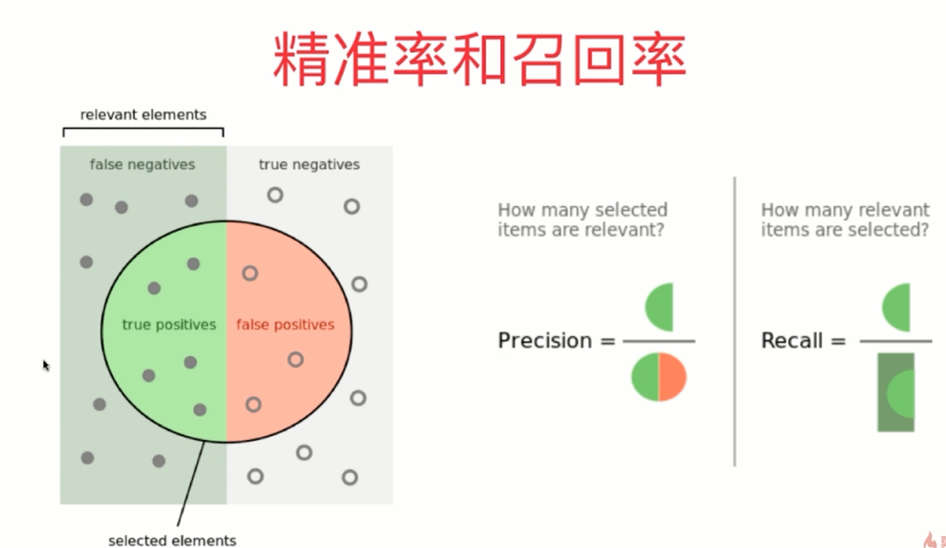

# 实现混淆矩阵、精准率和召回率

In [2]:
import numpy as np
from sklearn import datasets

In [6]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [9]:
y_log_predict = log_reg.predict(X_test)

In [13]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true ==0) & (y_predict == 0))

TN(y_test, y_log_predict)

403

In [14]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true ==0) & (y_predict == 1))

FP(y_test, y_log_predict)

2

In [15]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true ==1) & (y_predict == 0))

FN(y_test, y_log_predict)

9

In [16]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true ==1) & (y_predict == 1))

TP(y_test, y_log_predict)

36

In [17]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_test, y_log_predict), FP(y_test, y_log_predict)],
        [FN(y_test, y_log_predict), TP(y_test, y_log_predict)]
    ])

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [18]:
def presision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
    
presision_score(y_test, y_log_predict)

0.9473684210526315

In [19]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0

recall_score(y_test, y_log_predict)

0.8

# scikit-learn中的混淆矩阵、精准率和召回率

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [22]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8